# Logistic Regression 

__Linear Function__
\begin{equation}
z = \sum_{i=1}^{n} w_i\cdot x_i + b  
\end{equation}



# Softmax function

__The Softmax for the c'th class is defined as__ 

\begin{equation}
\frac{e^{Zc}}{\sum_{c}^{c=1}e^{Zc}}
\end{equation}

__where Z = w.X + b, y_hat = Softamx(w.X+b) and c = number of classes__


# Cross-Entropy Loss

\begin{equation}
L = -\sum_{c}^{c=1}y_{c}log(\hat{y_c})
\end{equation}

In [1]:
import numpy as np 
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

iris = datasets.load_iris()
scalar = StandardScaler()

X = iris.data
X = scalar.fit_transform(X)
y = iris.target

x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

__Shapes__

__X -------> n_samples, n_features__
<br>
__y_hot --> n_samples, n_class__
<br>
__w --------> n_class, n_features__

In [2]:
class SoftmaxRegression():

    def __init__(self, epochs = 1000, lr = 0.001, n_class = 3):

        self.n_class = n_class
        self.epochs = epochs 
        self.lr = lr
        
        self.w = None
        self.b = None 

    def softmax(self, z):
        # subtracting max value for numerical stability
        y_hat = np.exp(z - np.max(z))
    
        # Probablity for each class
        for i in range(len(y_hat)):
            y_hat[i] = y_hat[i]/np.sum(y_hat[i])

        return y_hat 

    def OneHotEncoder(self, y):
        y_hot = np.zeros((len(y), self.n_class))
        y_hot[np.arange(len(y)), y] = 1
        return y_hot

    def CostFunction(self, y_hot, y_hat):
        return -(1/len(y_hat))*np.sum(y_hot*np.log(y_hat))

    def fit(self, x, y):

        n_samples, n_features = x.shape
        self.w = np.zeros((self.n_class, n_features))
        self.b = 0

        losses = []

        for epoch in range(self.epochs):

            #calculate z = w*X +b
            z = np.dot(x, self.w.T) + self.b
            
            # call softamx on z
            y_pred = self.softmax(z)

            # OneHotencoding y
            y_hot = self.OneHotEncoder(y)

            # calculate loss
            loss = self.CostFunction(y_hot, y_pred)

            #apppend the loss
            losses.append(loss)
        
            #Gradient 
            dw = (-2/n_samples)*np.dot((y_hot - y_pred).T, x)
            db = (-2/n_samples)*np.sum(y_hot - y_pred)
        
            #update parameters
            self.w = self.w - self.lr*dw
            self.b = self.b - self.lr*db
        
            if epoch%100==0:
                print(f"Training: Epochs {epoch}, loss:{loss}")

        return losses 

    def predict(self, x, y):
        z =  np.dot(x, self.w.T) + self.b
        y_pred =  self.softmax(z) 
        return (np.argmax(y_pred,axis=1)==y).mean()
    

Training: Epochs 0, loss:1.0986122886681098
Training: Epochs 100, loss:0.94099594429686
Training: Epochs 200, loss:0.8316283304258539
Training: Epochs 300, loss:0.7541397115649797
Training: Epochs 400, loss:0.6975301011687622
Training: Epochs 500, loss:0.6548265443961245
Training: Epochs 600, loss:0.6216459881051111
Training: Epochs 700, loss:0.5951890432201893
Training: Epochs 800, loss:0.5736206541345377
Training: Epochs 900, loss:0.5557027281358384


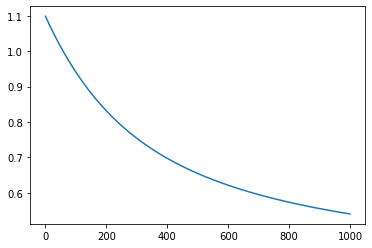

In [3]:
multi = SoftmaxRegression(epochs =1000, lr =0.001, n_class=3)
losses = multi.fit(x_train, y_train)

plt.plot(range(1000), losses)
plt.show()


In [4]:
multi.predict(x_test, y_test)

0.8666666666666667

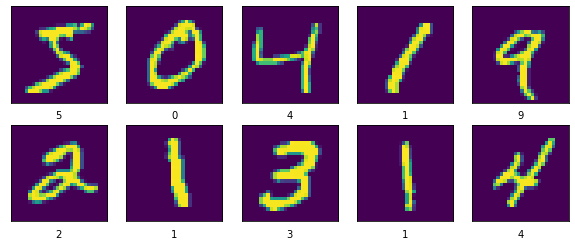

In [5]:
import tensorflow as tf 

(x_train, y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data() 

plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_train[i])

In [6]:
x_train.shape, y_train.shape 

((60000, 28, 28), (60000,))

In [7]:
#slicing just to look the result at first 20000 images
x_train = x_train[0:20000,]
y_train = y_train[0:20000,]

x_test = x_test[0:5000,]
y_test = y_test[0:5000,]


#Vector with 28*28 =784 features
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test  = x_test.reshape(x_test.shape[0], 28*28)

#Normalizing
x_train = x_train/255.0
x_test = x_test/255.0


Training: Epochs 0, loss:2.302585092994046
Training: Epochs 100, loss:0.4849704110992618
Training: Epochs 200, loss:0.40653743632344624
Training: Epochs 300, loss:0.37291836816502394
Training: Epochs 400, loss:0.3529044527751089
Training: Epochs 500, loss:0.3391150637188346
Training: Epochs 600, loss:0.3287926628300712
Training: Epochs 700, loss:0.3206429740149302
Training: Epochs 800, loss:0.3139664389165933
Training: Epochs 900, loss:0.3083464582625639


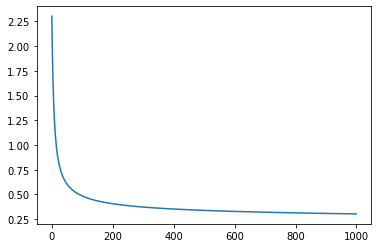

In [8]:
image_classification = SoftmaxRegression(epochs=1000, lr = 0.1, n_class = 10)
losses = image_classification.fit(x_train,y_train)

plt.plot(range(1000), losses)
plt.show()

In [9]:
image_classification.predict(x_test,y_test)

0.8892